In [1]:
import pandas as pd 
import numpy as np
import os
import category_encoders as c

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# loading training data

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head() #displays top 5 rows from train.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# loading test data

In [3]:
testing_data=pd.read_csv("/kaggle/input/titanic/test.csv")
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# % of women survived

In [4]:
women_survived=training_data.loc[training_data.Sex=="female"]["Survived"]
women_per=sum(women_survived)/len(women_survived)
print("percentage of women survived: ",women_per)

percentage of women survived:  0.7420382165605095


# % of men survived

In [5]:
men_survived=training_data.loc[training_data.Sex=="male"]["Survived"]
men_per=sum(men_survived)/len(men_survived)
print("percentage of men survived: ",men_per)

percentage of men survived:  0.18890814558058924


# check if any missing values in train data

In [6]:
training_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

By fixing the missing values in columns Age=177, Cabin=687, Embarked=2 performance can be increased

# check if any missing values in test data

In [7]:
testing_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

By fixing the missing values in columns Age=86, Cabin=327 performance can be increased

# Replacing the missing values in train.csv 

In [8]:
training_data['Age']=training_data['Age'].fillna(training_data['Age'].median())
training_data['Fare']=training_data['Fare'].fillna(training_data['Fare'].median())
training_data['Cabin']=training_data['Cabin'].fillna(training_data['Cabin'].mode()[0])
training_data['Embarked']=training_data['Embarked'].fillna(training_data['Embarked'].mode()[0])

Since the type of data in Age column is numerical, I have replaced the missing values with their mean. For the categorical data in columns Cabin,Embarked, replaced missing values with their most repeated value(mode)

In [9]:
training_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Replacing missing values in test.csv

In [10]:
testing_data['Age']=testing_data['Age'].fillna(testing_data['Age'].median())
testing_data['Fare']=testing_data['Fare'].fillna(testing_data['Fare'].median())
testing_data['Cabin']=training_data['Cabin'].fillna(testing_data['Cabin'].mode()[0])
testing_data['Embarked']=testing_data['Embarked'].fillna(testing_data['Embarked'].mode()[0])

Since the type of data in columns Age,Fare is numerical, I have replaced the missing values with their mean. For the categorical data in columns Cabin,Embarked, replaced missing values with their most repeated value(mode)

In [11]:
testing_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# converting training categorical data to numerical data

In [12]:
training_data['Name'] =training_data['Name'].astype('category').cat.codes
training_data['Sex'] =training_data['Sex'].astype('category').cat.codes
training_data['Embarked'] =training_data['Embarked'].astype('category').cat.codes
training_data['Cabin'] =training_data['Cabin'].astype('category').cat.codes
training_data['Ticket'] =training_data['Ticket'].astype('category').cat.codes

# converting testing categorical data to numerical data

In [13]:
testing_data['Name'] =testing_data['Name'].astype('category').cat.codes
testing_data['Sex'] =testing_data['Sex'].astype('category').cat.codes
testing_data['Embarked'] =testing_data['Embarked'].astype('category').cat.codes
testing_data['Cabin'] =testing_data['Cabin'].astype('category').cat.codes
testing_data['Ticket'] =testing_data['Ticket'].astype('category').cat.codes

# Encoding training data

In [14]:
encoder=c.BinaryEncoder(cols=['Name','Sex','Ticket','Cabin','Embarked'],return_df=True)
encoder.fit_transform(training_data)

,PassengerId,Survived,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,...,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Embarked_0,Embarked_1
0,1,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,5,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
887,888,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,1
888,889,0,3,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
889,890,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,1,1,0


# Encoding testing data

In [15]:
encoder=c.BinaryEncoder(cols=['Name','Sex','Ticket','Cabin','Embarked'],return_df=True)
encoder.fit_transform(testing_data)

,PassengerId,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
0,892,3,0,0,0,0,0,0,0,0,...,7.8292,0,0,0,0,0,0,1,0,1
1,893,3,0,0,0,0,0,0,0,1,...,7.0000,0,0,0,0,0,1,0,1,0
2,894,2,0,0,0,0,0,0,0,1,...,9.6875,0,0,0,0,0,0,1,0,1
3,895,3,0,0,0,0,0,0,1,0,...,8.6625,0,0,0,0,0,1,1,1,0
4,896,3,0,0,0,0,0,0,1,0,...,12.2875,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,1,1,1,1,...,8.0500,0,0,0,0,0,0,1,1,0
414,1306,1,1,1,0,0,1,1,1,1,...,108.9000,0,0,0,0,0,0,1,1,1
415,1307,3,1,1,0,1,0,0,0,0,...,7.2500,0,0,0,0,0,0,1,1,0
416,1308,3,1,1,0,1,0,0,0,0,...,8.0500,0,0,0,0,0,0,1,1,0


# Correlation of Training data

In [16]:
names=['Survived','Pclass','Name','Sex','Age','SibSp', 'Parch','Ticket','Fare','Cabin','Embarked','PassengerId']
l=training_data[training_data.columns[1:]].corr()['Survived']
l



Survived    1.000000
Pclass     -0.338481
Name       -0.057343
Sex        -0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Ticket     -0.164549
Fare        0.257307
Cabin       0.175690
Embarked   -0.167675
Name: Survived, dtype: float64

# Correlation coefficient threshold selection of training_data

In [17]:
for i in range(len(l)):
    if abs(l[i]) > 0.15:
        print(names[i])

Survived
Pclass
Sex
Ticket
Fare
Cabin
Embarked


# Accuracy score calculation using correlation threshold

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = training_data["Survived"]

features = ["Pclass", "Sex","Ticket","Fare","Cabin","Embarked"]
X = pd.get_dummies(training_data[features])
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.37, random_state=42)
#X_test = pd.get_dummies(testing_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))

0.8303030303030303


# Chi-Square test

In [19]:
from sklearn.feature_selection import chi2
X = training_data.drop('Survived',axis=1)
y = training_data['Survived']
chi_scores = chi2(X,y)
chi_scores

(array([3.31293407e+00, 3.08736994e+01, 4.35568915e+02, 9.27024470e+01,
        2.16491630e+01, 2.58186538e+00, 1.00974991e+01, 2.87165547e+03,
        4.51831909e+03, 2.84482789e+02, 1.02025247e+01]),
 array([6.87366651e-02, 2.75378563e-08, 9.97314604e-97, 6.07783826e-22,
        3.27352826e-06, 1.08094210e-01, 1.48470676e-03, 0.00000000e+00,
        0.00000000e+00, 7.92037850e-64, 1.40248517e-03]))

<AxesSubplot:>

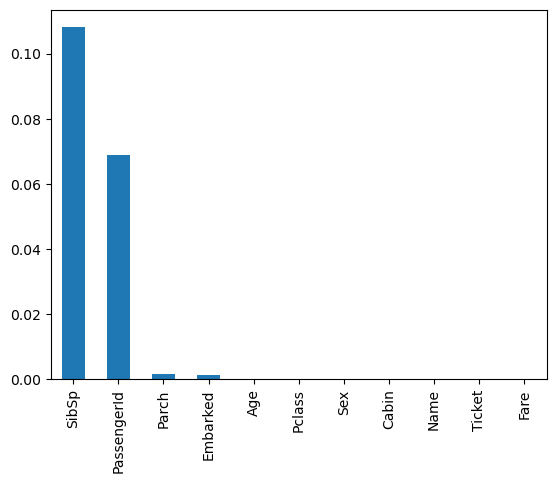

In [20]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = training_data["Survived"]

features = ["Pclass", "Sex","Age","Cabin","Name","Ticket","Fare"]
X = pd.get_dummies(training_data[features])
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.37, random_state=42)
#X_test = pd.get_dummies(testing_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions_rf = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictions_rf))


0.8666666666666667


In [22]:
test_predict = model.predict(testing_data[features])
test_predict


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Generating output csv

In [23]:
output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': test_predict})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# using RandomForest Classifier for prediction

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = training_data["Survived"]

features = ["Pclass", "Sex","Age","Cabin","Name","Ticket","Fare"]
X = pd.get_dummies(training_data[features])
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.37, random_state=42)
#X_test = pd.get_dummies(testing_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))


0.8666666666666667
